MNIST 이미지 압축 예제

In [48]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

In [49]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)

In [75]:
X = x_train[0] # 5
X = X.reshape(28,28)

[ TIP ]  
  
공분산 행렬의 고유값과 고유벡터를 이용하기 위해 데이터 X를 평균 mu로 빼고 SVD를 계산하는 것이 일반적이다.

In [155]:
# 1. Set Input
mu = np.mean(X,axis=0)
X_tilde = X-mu
m=X_tilde.shape[0]
n=X_tilde.shape[1]
print('(m:{}, n:{})'.format(m,n))

(m:28, n:28)


U: (28, 28)
S: (28, 28)
V: (28, 28)


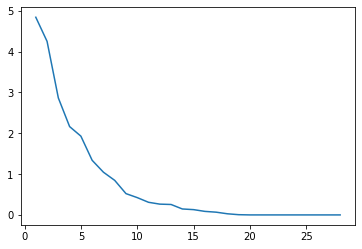

In [154]:
# 2. SVD 
U,Sigma,VT = np.linalg.svd(X_tilde)

# set S, V
S=np.eye(N=m, M=n,k=0)
np.fill_diagonal (S,Sigma)
V=VT.T

# check
print('U:',U.shape) # left singular vectors (u1 | u2 | u3 | ....) <mxm> 
print('S:',S.shape) # singular values (diagonal -> σ1, σ2, σ3, ...) <mxn> 
print('V:',V.shape) # right singular vectors (v1 | v2 | v3 | ....) <nxn> 
plt.plot([i for i in range(1,min(m,n)+1)],Sigma)

위 그래프를 보면 10개의 특이값을 이용해서 데이터를 충분히 표현할 수 있음을 짐작 가능함

특이값 전체를 이용해서 재구축

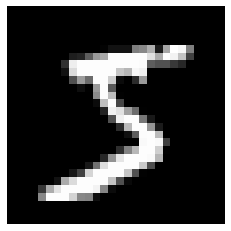

In [151]:
# 3-1. Reconstruction (Full SVD)
Y = np.dot(U,S)
R = np.dot(Y,V.T)
R = R+mu

# show
plt.imshow(R,cmap='gray')
plt.axis('off')
plt.savefig('original.jpg')

특이값 10개를 이용해서 재구축 (영상 압축)

U[:,:t]: (28, 10)
S[:t,:t]: (10, 10)
V.T[:t,:]: (10, 28)


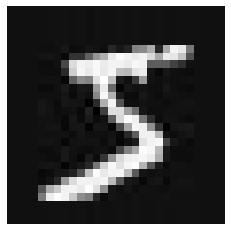

In [153]:
# 3-2. Reconstruction (Truncated SVD)
t=10
Y = np.dot(U[:,:t],S[:t,:t])
R = np.dot(Y,V.T[:t,:])
R = R+mu

# check
print('U[:,:t]:',U[:,:t].shape) # <mxt> 
print('S[:t,:t]:',S[:t,:t].shape) # <txt> 
print('V.T[:t,:]:',V.T[:t,:].shape) # <txn> 

# show
plt.imshow(R,cmap='gray')
plt.axis('off')
plt.savefig('zip.jpg')